<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/Inventario_de_varios_art%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimizacion con restriccion (lambda)

Vamos a sacar la formula de y* con sympy, luego la volvemos funcion numerica y al final buscamos el lambda que haga que el area total sea igual al limite.


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Paso 1 y 2

1) Armamos el Lagrangiano y derivamos en y para obtener y*(lambda)
2) Convertimos esa expresion a funcion con lambdify y calculamos el area total


In [ ]:
datos = [
    {'id': 1, 'K': 10, 'D': 2, 'h': 0.30, 'a': 1.0},
    {'id': 2, 'K':  5, 'D': 4, 'h': 0.10, 'a': 1.0},
    {'id': 3, 'K': 15, 'D': 4, 'h': 0.20, 'a': 1.0},
]

Area_Disponible = 25.0

# simbolos
y, K, D, h, a, lam = sp.symbols('y K D h a lambda')

# Lagrangiano
L = (K*D)/y + (h*y)/2 - lam*(a*y)

# derivada y solucion para y*
dL_dy = sp.diff(L, y)
sol_y = sp.solve(sp.Eq(dL_dy, 0), y)

# tomamos la positiva (normalmente es la segunda)
y_star = sp.simplify(sol_y[1])
sp.pprint(y_star)

# a funcion numerica
y_num = sp.lambdify((K, D, h, a, lam), y_star, 'numpy')

def area_total(lambda_val):
    total = 0.0
    for it in datos:
        y_val = y_num(it['K'], it['D'], it['h'], it['a'], lambda_val)
        total += y_val * it['a']
    return float(total)

area_inicial = area_total(0.0)

if area_inicial > Area_Disponible:
    print(f"\nRestriccion no cumplida: {area_inicial:.2f} > {Area_Disponible}")
else:
    print(f"\nRestriccion si cumple: {area_inicial:.2f} <= {Area_Disponible}")


       ___________
      ╱   -D⋅K    
√2⋅  ╱  ───────── 
   ╲╱   2⋅a⋅λ - h 

Restriccion no cumplida: 56.04 > 25.0


### Paso 3

Si no cumple con lambda = 0, buscamos el lambda optimo con biseccion para que:
area_total(lambda) - Area_Disponible = 0

Tambien graficamos para ver que si cruza el limite.


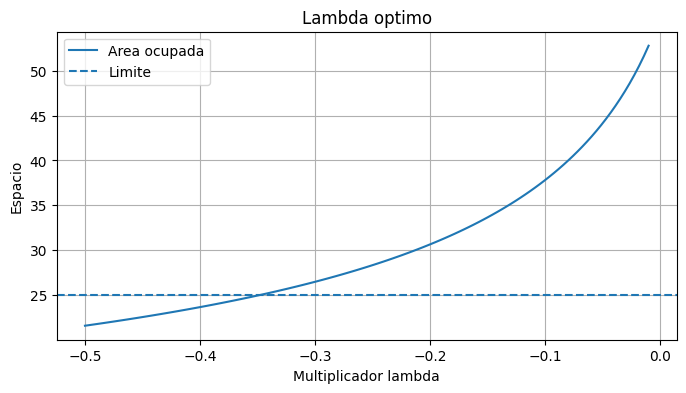


Lambda optimo: -0.347958
Resultados finales
id           y*(opt)
--------------------
1           6.337512
2           7.089189
3          11.573299

Area total final: 25.000000


In [30]:
if area_inicial > Area_Disponible:
    lambdas_plot = np.linspace(-0.5, -0.01, 120)
    areas_plot = [area_total(L) for L in lambdas_plot]

    plt.figure(figsize=(8, 4))
    plt.plot(lambdas_plot, areas_plot, label='Area ocupada')
    plt.axhline(y=Area_Disponible, linestyle='--', label='Limite')
    plt.xlabel('Multiplicador lambda')
    plt.ylabel('Espacio')
    plt.title('Lambda optimo')
    plt.grid(True)
    plt.legend()
    plt.show()

    f_obj = lambda L: area_total(L) - Area_Disponible
    lambda_opt = opt.bisect(f_obj, -10, -0.0001)

    print(f"\nLambda optimo: {lambda_opt:.6f}")
    print("Resultados finales")
    print(f"{'id':<6}{'y*(opt)':>14}")
    print("-"*20)

    suma_area = 0.0
    for it in datos:
        y_opt = y_num(it['K'], it['D'], it['h'], it['a'], lambda_opt)
        suma_area += y_opt * it['a']
        print(f"{it['id']:<6}{float(y_opt):>14.6f}")

    print(f"\nArea total final: {suma_area:.6f}")

else:
    print("No hace falta ajustar lambda, ya cumple desde el inicio")
